##**Mengimpor Library Yang dibutuhkan**

In [ ]:
# Mengimpor Library Yang Dibutuhkan
!pip install tensorflow_text
import nltk
nltk.download("popular")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_text as tf_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 588.3 MB 14 kB/s 
     |████████████████████████████████| 439 kB 44.1 MB/s 
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
     |████████████████████████████████| 6.0 MB 38.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.1

##**Memasukkan Data**

In [ ]:
# Membaca Data Di Local
# dataframe_sentiment = pd.read_csv('dataset.csv', names=["Username", "Score", "Ulasan"], header=None) #aktifkan ketika run di local

# Membaca Data Dari google drive
from google.colab import drive
drive.mount('/content/drive')
dataset_ulasan = pd.read_csv('/content/drive/My Drive/Skripsi/dataset_original.csv') #aktifkan ketika run di colab
# dataset_ulasan = pd.read_excel('/content/drive/My Drive/Skripsi/dataset.xlsx') # excel

# Menampilkan Dataset Ulasan
dataset_ulasan

Mounted at /content/drive


,userName,score,content
0,Kusyati Nisa,5,Mantaf skali mudah juga buat ikut pelatihan pr...
1,Nurul Latifah,5,keren buat beli kartu prakerjaa
2,Lukman Hadi,1,"Lapak saya dibekukan, sudah komplain tidak ada..."
3,Felisona Hulu,1,Benar2 mengecewakan.Respon sangat lama.pokok n...
4,Don faizal,5,Ini adalah salah satu tempat terbaik untuk bel...
...,...,...,...
2995,Wa hyu,5,"Kenapa selalu muncul iklan, padahal aplikasi s..."
2996,Pengguna Google,3,Tolong dong.. sejak update memori penyimpanan ...
2997,Pengguna Google,3,"Saya senang banget berbelanja di bukalapak, se..."
2998,Pengguna Google,1,Aplikasi tidak berjalan.sudah di re instal tet...


In [ ]:
# Menampilkan Informasi mengenai dataframe
dataset_ulasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  3000 non-null   object
 1   score     3000 non-null   int64 
 2   content   3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [ ]:
# Menampilkan Ulasan dan aspek lainnya saja
df_analisis_sentimen = dataset_ulasan.iloc[:, 2:]
df_analisis_sentimen.rename(columns = {'content':'Ulasan'}, inplace = True)

df_analisis_sentimen

,Ulasan
0,Mantaf skali mudah juga buat ikut pelatihan pr...
1,keren buat beli kartu prakerjaa
2,"Lapak saya dibekukan, sudah komplain tidak ada..."
3,Benar2 mengecewakan.Respon sangat lama.pokok n...
4,Ini adalah salah satu tempat terbaik untuk bel...
...,...
2995,"Kenapa selalu muncul iklan, padahal aplikasi s..."
2996,Tolong dong.. sejak update memori penyimpanan ...
2997,"Saya senang banget berbelanja di bukalapak, se..."
2998,Aplikasi tidak berjalan.sudah di re instal tet...


##**Tahapan Preprocessing**


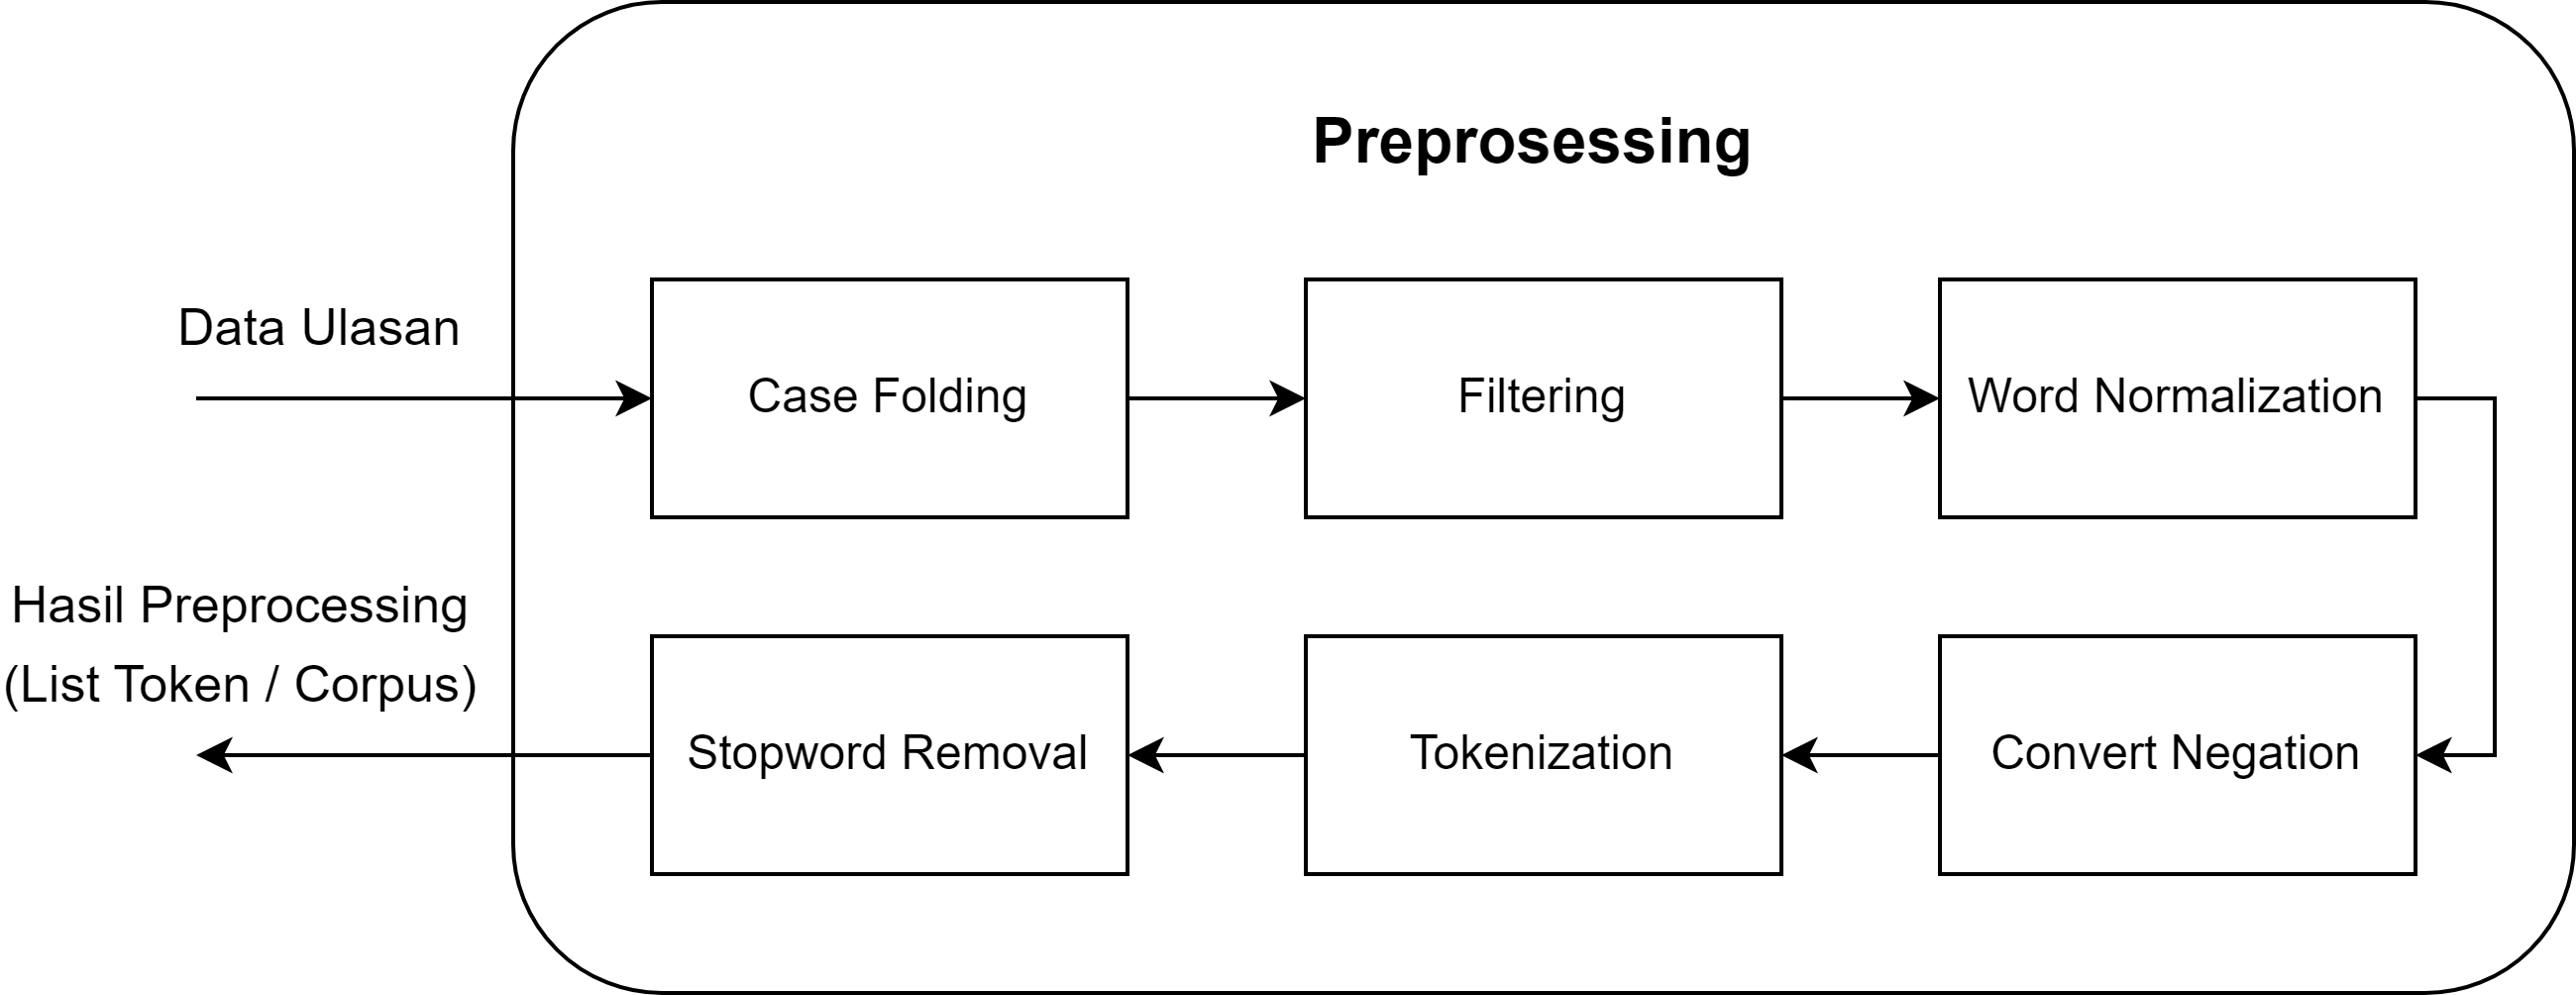

### **Casefolding**

In [ ]:
case_folding = df_analisis_sentimen["Ulasan"].str.lower()

df_analisis_sentimen["Ulasan"] = case_folding

df_analisis_sentimen

,Ulasan
0,mantaf skali mudah juga buat ikut pelatihan pr...
1,keren buat beli kartu prakerjaa
2,"lapak saya dibekukan, sudah komplain tidak ada..."
3,benar2 mengecewakan.respon sangat lama.pokok n...
4,ini adalah salah satu tempat terbaik untuk bel...
...,...
2995,"kenapa selalu muncul iklan, padahal aplikasi s..."
2996,tolong dong.. sejak update memori penyimpanan ...
2997,"saya senang banget berbelanja di bukalapak, se..."
2998,aplikasi tidak berjalan.sudah di re instal tet...


### **Filtering**

In [ ]:
import re
import string

hilangkan_tanda_baca = string.punctuation
def filtering(teks):

    # Menghilangkan url jika ada
    teks = re.sub(r'http\S+', '', teks)
    teks = re.sub(r'https\S+', '', teks)

    # Menghilangkan spasi dan tanda baca kecuali underscore
    teks = re.sub(r'''     
               \W+     
               \s*     
               ''',    
               ' ',    
               teks,
               flags=re.VERBOSE)
    
    # Menghilangkan angka atau digit
    teks = ' '.join(re.sub(r"\d+", "", teks).split())

    # Menghilangkan Unicode, spasi tab, dan, new line / Emoji
    teks = teks.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ")

    # Encoding dan decode ascii (konversi byte)
    teks = teks.encode('ascii', 'replace').decode('ascii')

    # Menghilangkan semua tanda baca
    teks = teks.translate(str.maketrans(' ', ' ', hilangkan_tanda_baca))
    
    # Menghilangkan satu karakter
    return re.sub(r"\b[a-zA-Z]\b", "", teks)

    # Menghilangkan white space lebih
    teks = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", teks).split())

filtering_ulasan = []

for kalimat in df_analisis_sentimen["Ulasan"]:
  kalimat = filtering(kalimat)
  filtering_ulasan.append(kalimat)

df_analisis_sentimen["Ulasan"] = filtering_ulasan

df_analisis_sentimen

,Ulasan
0,mantaf skali mudah juga buat ikut pelatihan pr...
1,keren buat beli kartu prakerjaa
2,lapak saya dibekukan sudah komplain tidak ada ...
3,benar mengecewakan respon sangat lama pokok ny...
4,ini adalah salah satu tempat terbaik untuk bel...
...,...
2995,kenapa selalu muncul iklan padahal aplikasi su...
2996,tolong dong sejak update memori penyimpanan ja...
2997,saya senang banget berbelanja di bukalapak sem...
2998,aplikasi tidak berjalan sudah di re instal tet...


### **Word Normalization**

**Kamus Untuk Word Normalization**

In [ ]:
# kamus_informal_to_formal = pd.read_csv('kamus_normalization.tsv',sep='\t') #local
kamus_informal_to_formal = pd.read_csv('/content/drive/My Drive/Skripsi/kamus_normalization.tsv',sep='\t') # google colab
kamus_informal_to_formal = kamus_informal_to_formal.iloc[:,1:3]
kamus_informal_to_formal

,informal,formal
0,0kmh,0 kmh
1,1007mb,1007 mb
2,1008mb,1008 mb
3,1009mb,1009 mb
4,100k,100 ribu
...,...,...
17839,mendikbud,menteri pendidikan dan kebudayaan
17840,mendag,menteri perdagangan
17841,menaker,menteri tenaga kerja
17842,memetwit,mentwit


In [ ]:
kamus_normalisasi = {}

# penambahan yang tidak ada di kamus sebelumnya, wahid -> satu
kamus_normalisasi = {"x": "kali", "now": "sekarang", "min": "admin"}

for index, row in kamus_informal_to_formal.iterrows():
    if row[0] not in kamus_normalisasi:
        kamus_normalisasi[row[0]] = row[1]

token_ulasan = []

# konversi list string to list of words
for kalimat in df_analisis_sentimen["Ulasan"]:
  token_ulasan.append(kalimat.split())

df_analisis_sentimen["Ulasan"] = token_ulasan

def word_normalization(text):
    return [kamus_normalisasi[word] if word in kamus_normalisasi else word for word in text]


df_analisis_sentimen['Ulasan'] = df_analisis_sentimen['Ulasan'].apply(lambda text: word_normalization(text))

df_analisis_sentimen

,Ulasan
0,"[mantap, sekali, mudah, juga, buat, ikut, pela..."
1,"[keren, buat, beli, kartu, prakerjaa]"
2,"[lapak, saya, dibekukan, sudah, komplain, tida..."
3,"[benar, mengecewakan, respon, sangat, lama, po..."
4,"[ini, adalah, salah, satu, tempat, terbaik, un..."
...,...
2995,"[kenapa, selalu, muncul, iklan, padahal, aplik..."
2996,"[tolong, dong, sejak, pembaruan, memori, penyi..."
2997,"[saya, senang, sangat, berbelanja, di, bukalap..."
2998,"[aplikasi, tidak, berjalan, sudah, di, re, ins..."


In [ ]:
# Menyatukan Kembali
df_analisis_sentimen['Ulasan'] = df_analisis_sentimen['Ulasan'].str.join(" ")

df_analisis_sentimen

,Ulasan
0,mantap sekali mudah juga buat ikut pelatihan p...
1,keren buat beli kartu prakerjaa
2,lapak saya dibekukan sudah komplain tidak ada ...
3,benar mengecewakan respon sangat lama pokok ny...
4,ini adalah salah satu tempat terbaik untuk bel...
...,...
2995,kenapa selalu muncul iklan padahal aplikasi su...
2996,tolong dong sejak pembaruan memori penyimpanan...
2997,saya senang sangat berbelanja di bukalapak sem...
2998,aplikasi tidak berjalan sudah di re install te...


### **Convert Negation**

In [ ]:
def convert_negation(teks):
    convert_tidak = teks.replace("tidak ", "tidak_")
    convert_belum = convert_tidak.replace("belum ", "belum_")
    convert_jangan = convert_belum.replace("jangan ", "jangan_")
    convert_tak = convert_jangan.replace("tak ", "tak_")
    last_convert = convert_tak.replace("bukan ", "bukan_")

    return last_convert

string = "antum belum makan"

konversi_negasi = convert_negation(string)
konversi_negasi

konversi_negasi_list = []
for kata in df_analisis_sentimen['Ulasan']:
  hasil_konversi = convert_negation(kata)
  konversi_negasi_list.append(hasil_konversi)

df_analisis_sentimen['Ulasan'] = konversi_negasi_list

df_analisis_sentimen

,Ulasan
0,mantap sekali mudah juga buat ikut pelatihan p...
1,keren buat beli kartu prakerjaa
2,lapak saya dibekukan sudah komplain tidak_ada ...
3,benar mengecewakan respon sangat lama pokok ny...
4,ini adalah salah satu tempat terbaik untuk bel...
...,...
2995,kenapa selalu muncul iklan padahal aplikasi su...
2996,tolong dong sejak pembaruan memori penyimpanan...
2997,saya senang sangat berbelanja di bukalapak sem...
2998,aplikasi tidak_berjalan sudah di re install te...


### **Tokenization**

In [ ]:
from nltk.tokenize import word_tokenize
tokenisasi = [word_tokenize(kata) for kata in df_analisis_sentimen['Ulasan']]

df_analisis_sentimen['Ulasan'] = tokenisasi

df_analisis_sentimen

,Ulasan
0,"[mantap, sekali, mudah, juga, buat, ikut, pela..."
1,"[keren, buat, beli, kartu, prakerjaa]"
2,"[lapak, saya, dibekukan, sudah, komplain, tida..."
3,"[benar, mengecewakan, respon, sangat, lama, po..."
4,"[ini, adalah, salah, satu, tempat, terbaik, un..."
...,...
2995,"[kenapa, selalu, muncul, iklan, padahal, aplik..."
2996,"[tolong, dong, sejak, pembaruan, memori, penyi..."
2997,"[saya, senang, sangat, berbelanja, di, bukalap..."
2998,"[aplikasi, tidak_berjalan, sudah, di, re, inst..."


### **Stopword Removal**

In [ ]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('indonesian')
# print(STOPWORDS)

# penambahan stopword
STOPWORDS.extend(['kali', 'nya'])
# STOPWORDS.extend(['amp','hahaha','ya','bnr','bener','iya','dikit','sih','nya', 'yg', 'dll','gara', 'dan lain', 'dan lain-lain', 'oh','y','g','yes', 'yang','gak','bgt','ku','buat','karena','karna','ga','udah','udh','pas','kalau','kalo','eh','deh','coba','oke','a','aa','aaa','aaaa','aaaaa','huhuhu','hihihi','hahaha','hehehe','he','heh','hehe','si','ah','aja','ni','ini','xixi','da'])

stopword_list = set(STOPWORDS)

# Kata yang tidak seharusnya dibuang : membuat, dapat
# stopword_list.remove("dapat")

def stopword_removal(teks):
    return [kata for kata in teks if kata not in stopword_list]

pembuangan_stopword = df_analisis_sentimen['Ulasan'].apply(lambda text: stopword_removal(text))
df_analisis_sentimen['Ulasan'] = pembuangan_stopword

df_analisis_sentimen

,Ulasan
0,"[mantap, mudah, pelatihan, prakerja, mudah, su..."
1,"[keren, beli, kartu, prakerjaa]"
2,"[lapak, dibekukan, komplain, tidak_ada, tangga..."
3,"[mengecewakan, respon, pokok, tidak_rekomended]"
4,"[salah, terbaik, belanja, online, penjual, pem..."
...,...
2995,"[muncul, iklan, aplikasi, close, memgganggu, m..."
2996,"[tolong, pembaruan, memori, penyimpanan, tidak..."
2997,"[senang, berbelanja, bukalapak, semja, mudah, ..."
2998,"[aplikasi, tidak_berjalan, re, install, tidak_..."


**Menghitung Korpus Setelah Stopword Removal**

In [ ]:
# Menghitung panjang corpus setelh di stopword removal
df_analisis_sentimen['Jumlah Corpus Stopword'] = df_analisis_sentimen['Ulasan'].str.len()

print(f"Jumlah Corpus: {df_analisis_sentimen['Jumlah Corpus Stopword'].sum()}")
df_analisis_sentimen

Jumlah Corpus: 42796


,Ulasan,Jumlah Corpus Stopword
0,"[mantap, mudah, pelatihan, prakerja, mudah, su...",7
1,"[keren, beli, kartu, prakerjaa]",4
2,"[lapak, dibekukan, komplain, tidak_ada, tangga...",8
3,"[mengecewakan, respon, pokok, tidak_rekomended]",4
4,"[salah, terbaik, belanja, online, penjual, pem...",11
...,...,...
2995,"[muncul, iklan, aplikasi, close, memgganggu, m...",13
2996,"[tolong, pembaruan, memori, penyimpanan, tidak...",32
2997,"[senang, berbelanja, bukalapak, semja, mudah, ...",22
2998,"[aplikasi, tidak_berjalan, re, install, tidak_...",20


**Menghitung Jumlah Kata Tertentu**

In [ ]:
# df_analisis_sentimen['Kalimat'] = df_analisis_sentimen['Ulasan'].str.join(" ")

# df_analisis_sentimen['Bukalapak'] = df_analisis_sentimen['Ulasan'].str.count('layanan')
# print(f"Jumlah kata Bukalapak: {df_analisis_sentimen['Bukalapak'].sum()}")
# df_analisis_sentimen

## **Word Embedding**


In [ ]:
# Agar token aspek di bagian belakang ketika pembuatan korpus
# gabungan_tanpa_token_aspek = []

# for list_token in df_analisis_sentimen['Ulasan']:
#   for tiap_list in list_token:
# for kalimat in hasil_token_aspek:
#   for kata in kalimat:
#     gabungan_token.append(kata)

# print(f"Jumlah Seluruh Token Gabungan: {len(gabungan_token)}")
# print(f"""Token Gabungan:
# {gabungan_token}""")

### **Penambahan Token Aspek**

In [ ]:
from keras.preprocessing.text import Tokenizer

list_token = []
token_aspek = ['<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>']

for token in df_analisis_sentimen['Ulasan']:
  list_token.append(token)

# print(f"List token:\n {list_token}")

hasil_token_aspek = []

# udah dijalanin, jangan dijalananin biar token aspek tidak bertambahs
for tiap_list in list_token:
  tiap_list.extend(token_aspek)
  hasil_token_aspek.append(tiap_list)

# print(f"List token:\n {hasil_token_aspek}")

# df_analisis_sentimen['Ulasan'] = list_token_aspek # sama aja

df_analisis_sentimen['Ulasan'] = hasil_token_aspek
df_analisis_sentimen.drop(columns=['Jumlah Corpus Stopword'])
df_analisis_sentimen.to_csv

,Ulasan
0,"[mantap, mudah, pelatihan, prakerja, mudah, su..."
1,"[keren, beli, kartu, prakerjaa, <LAYANAN>, <FI..."
2,"[lapak, dibekukan, komplain, tidak_ada, tangga..."
3,"[mengecewakan, respon, pokok, tidak_rekomended..."
4,"[salah, terbaik, belanja, online, penjual, pem..."
...,...
2995,"[muncul, iklan, aplikasi, close, memgganggu, m..."
2996,"[tolong, pembaruan, memori, penyimpanan, tidak..."
2997,"[senang, berbelanja, bukalapak, semja, mudah, ..."
2998,"[aplikasi, tidak_berjalan, re, install, tidak_..."


### **Pembuatan Kamus Corpus**

In [ ]:
gabungan_token = []

for kalimat in hasil_token_aspek:
  for kata in kalimat:
    gabungan_token.append(kata)

print(f"Jumlah Seluruh Token Gabungan: {len(gabungan_token)}")
print(f"""Token Gabungan:
{gabungan_token}""")

from nltk.probability import FreqDist
dist_freq = FreqDist()

for word in gabungan_token:
     dist_freq[word]+=1

df_jumlah_kata = pd.Series(data=dist_freq)

df_frekuensi_per_token = pd.DataFrame(data=df_jumlah_kata, columns=["Jumlah Token"])
df_frekuensi_per_token.index.name = "Token Unik"
df_frekuensi_per_token

Jumlah Seluruh Token Gabungan: 57796
Token Gabungan:
['mantap', 'mudah', 'pelatihan', 'prakerja', 'mudah', 'sungguh', 'bermanfaat', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'keren', 'beli', 'kartu', 'prakerjaa', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'lapak', 'dibekukan', 'komplain', 'tidak_ada', 'tanggapan', 'ditutup', 'sistem', 'tidak_jelas', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'mengecewakan', 'respon', 'pokok', 'tidak_rekomended', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'salah', 'terbaik', 'belanja', 'online', 'penjual', 'pembeli', 'bukalapak', 'proactive', 'pengambil', 'solusi', 'terbaik', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'membantu', 'berbelanja', 'dagangan', 'variatif', '<LAYANAN>', '<FITUR>', '<KEBERMANFAATAN>', '<BISNIS>', '<NON ASPEK>', 'appk', 'buka', 'lapak', 'susah', 'pembayaran', 'belum_terverifikasi', 'barang'

,Jumlah Token
Token Unik,
mantap,199
mudah,428
pelatihan,115
prakerja,124
sungguh,17
...,...
tidak_klik,1
aplod,1
ketidaknyamanan,1


In [ ]:
# Formal
index, kamus_corpus = 1, {}  # start indexing from 1
kamus_corpus['<pad>'] = 0  # add a padding token
jumlah_kata_sama = 0

gabungan_token.append("<UNKNOWN>")

for token in gabungan_token:
    if token not in kamus_corpus:
      kamus_corpus[token] = index
      index += 1
 
    elif token in kamus_corpus:
      jumlah_kata_sama += 1

# Inverse Kamus
kamus_corpus = {index: token for token, index in kamus_corpus.items()}

print('Jumlah Kata yang sama = ', jumlah_kata_sama)
        
jumlah_corpus = len(kamus_corpus)
print(f"Jumlah Corpus = {jumlah_corpus}")

df_kamus_corpus = pd.DataFrame.from_dict(kamus_corpus, orient='index')
df_kamus_corpus.index.name = "Indeks ke-"
df_kamus_corpus.columns = ['Kamus Corpus']
df_kamus_corpus

# gabungan_tanpa_token_aspek.extend(token_aspek)
# kamus_corpus.append("<UNKNOWN>")

Jumlah Kata yang sama =  51838
Jumlah Corpus = 5960


,Kamus Corpus
Indeks ke-,
0,<pad>
1,mantap
2,mudah
3,pelatihan
4,prakerja
...,...
5955,aplod
5956,ketidaknyamanan
5957,keruntuhannya


### **One-hot Encoding**

In [ ]:
list_to_dict = []
for key, value in kamus_corpus.items():
    list_to_dict.append(value)

# print(list_to_dict)
# # indices = [0, 68]
# depth = 68
# tf.one_hot(depth)


one_hot = np.identity(5960)

df_one_hot_contoh = pd.DataFrame(data=one_hot, dtype=int, index=list_to_dict, columns=list_to_dict, )
df_one_hot_contoh.index.name = "Kamus Corpus"
df_one_hot_contoh

,<pad>,mantap,mudah,pelatihan,prakerja,sungguh,bermanfaat,<LAYANAN>,<FITUR>,<KEBERMANFAATAN>,...,updatean,mempengaruhi,re,berlari,tidak_klik,aplod,ketidaknyamanan,keruntuhannya,berkunjung,<UNKNOWN>
Kamus Corpus,,,,,,,,,,,,,,,,,,,,,
<pad>,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mantap,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mudah,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pelatihan,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
prakerja,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aplod,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
ketidaknyamanan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
keruntuhannya,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### **Word2Vec (Continuous Bag of Words)**

In [ ]:
from gensim.model
